# Google Stock Prediction using Linear Regression

### Importing libraries

In [66]:
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
style.use('ggplot')

### Step 1: Gathering data

In [68]:
df = quandl.get("WIKI/GOOGL", authtoken="SrH-YyRJyGYYrx1gZ7TZ")

### Step 2: Data Pre-processing

In [69]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [70]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [71]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume', ]]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [72]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [73]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]
df.dropna(inplace=True)
y = np.array(df['label'])

C:\Users\Shrirang\AppData\Local\Temp\ipykernel_10220\3196962783.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Step 3: Model Training

In [75]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [76]:
accuracy = clf.score(X_test, y_test)
accuracy

0.9787288762839014

### Step 4:  Predicting the values

In [77]:
forecast_set = clf.predict(X_lately)
# print(forecast_set, accuracy, forecast_out)

### Step 5: Plotting the graph

In [78]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

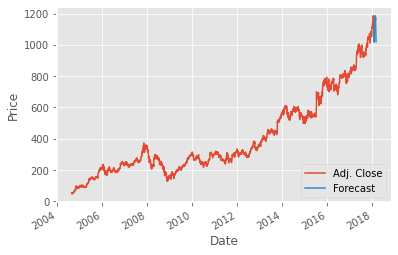

In [79]:

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()